In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import math
from sympy import * 
from sympy.solvers.solveset import linsolve
import pandas as pd

In [2]:
def dSdx(x, S, Ri, Ro, Ro1, k, A, B, Vbar1, Vbar2, mu):
    y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12 = S
    #inner tube
    eq1 = x**(-3)*math.log(((A+B)*Ri**2)**(-1/2)*(B*Ri**2+A*Ro**2)**(1/2))**(-1)*(((-1)+k**2)*Vbar1*y3+Vbar1*x*(y4+(-1)*x*y5)+x*(k**2*y1+(-1)*x*y2)*math.log(((A+B)*Ri**2)**(-1/2)*(B*Ri**2+A*Ro**2)**(1/2)))
    eq2 = x**(-4)*((-1)*B+x**2)**(-3)*(B**2*x**2*((-5)*((-1)+k**2)*y3+x*((-1)*(5+k**2)*y4+x*(y5+3*k**2*y5+(-10)*x*y6)))+B**3*(3*((-1)+k**2)*y3+x*((3+k**2)*y4+x*((-1)*(3+k**2)*y5+2*x*y6)))+(-1)*x**6*(((-1)+k**2)**2*y3+x*((-1)*(1+2*k**2)*y4+x*(5*y5+(-2)*k**2*y5+6*x*y6)))+B*x**4*(((-1)+k**4)*y3+x*(y4+(-4)*k**2*y4+x*(7*y5+(-4)*k**2*y5+14*x*y6))))
    #outer tube
    eq3 = x**(-3)*(x*(k**2*y7+(-1)*x*y8)+Vbar2*(x*y10+(-1)*x**2*y11+((-1)+k**2)*y9)*math.log ((B*Ri**2+A*Ro**2)**(-1/2)*(B*Ri**2+A*Ro1**2)**(1/2))**(-1))
    eq4 = x**(-4)*((-1)*B+x**2)**(-3)*(B**2*x**2*((-1)*(5+k**2)*x*y10+x**2*(y11+3*k**2*y11)+(-10)*x**3*y12+(-5)*((-1)+k**2)*y9)+B**3*((3+k**2)*x*y10+(-1)*(3+k**2)*x**2*y11+2*x**3*y12+3*((-1)+k**2)*y9)+(-1)*x**6*((-1)*x*(y10+2*k**2*y10)+(5+(-2)*k**2)*x**2*y11+6*x**3*y12+((-1)+k**2)**2*y9)+B*x**4*(x*(y10+(-4)*k**2*y10)+(7+(-4)*k**2)*x**2*y11+14*x**3*y12+((-1)+k**4)*y9))
    
    return [y2, eq1, y4, y5, y6, eq2, y8, eq3, y10, y11, y12, eq4]

In [15]:
arr = [2.4,2.3,2.2,2.1,2.0,1.9,1.8,1.7,1.6,1.5,1.4,1.3,1.2,1.1]
# arr = [1.58,1.56,1.54,1.52]
k = 2
Ri = 1
press = 0.04
mu = 1
thickness_ratio = 0.65

Volt = []
outer_rad = []
HR = []
A_str = []
B_str = []
pressure = []
Length = []
inner_lambda = []

for Ro1 in arr:
    
    Ro = thickness_ratio*(Ro1*1-1) + 1
    s1 = 'stacked_10mm_'
    s2 = str(round(10*Ro, 2))
    s3 = 'mm_'
    s4 = str(round(10*Ro1, 2))
    s5 = 'mm_pressure_'
    s6 = str(press)
    s7 = '_innervolt'
    s8 = '.xlsx'
    s = s1 + s2 + s3 + s4 + s5 + s6 + s7 + s8 
    print(s)
    df1 = pd.read_excel(s)
    det_str = []
    
    pressure.append(press)
    
    for j in np.arange(df1.shape[0]):
        i = j
        A = float(df1.Normalised_A[i])
        B = df1.Normalised_B[i]
        Vbar1 = df1.Voltage[i]
        co1 = df1.c1[i]
        co2 = df1.c2[i]
        flag = df1.flag[i]
        Vbar2 = 0

        x = np.linspace(math.sqrt(A+B), math.sqrt(A*(Ro/Ri)**2+B), 100)
        S_0 = (1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
        sol = odeint(dSdx, y0=S_0, t=x, tfirst=True, args=(Ri, Ro, Ro1, k, A, B, Vbar1, Vbar2, mu))
        y1_sol1 = []
        y1_sol1.append(sol[0][0])  #value of y1 at Ri for initial condition (1,0,0,0,0,0)
        y1_sol1.append(sol[-1][0]) #value of y1 at Ro for initial condition (1,0,0,0,0,0)
        y2_sol1 = []
        y2_sol1.append(sol[0][1])
        y2_sol1.append(sol[-1][1])
        y3_sol1 = []
        y3_sol1.append(sol[0][2])
        y3_sol1.append(sol[-1][2])
        y4_sol1 = []
        y4_sol1.append(sol[0][3])
        y4_sol1.append(sol[-1][3])
        y5_sol1 = []
        y5_sol1.append(sol[0][4])
        y5_sol1.append(sol[-1][4])
        y6_sol1 = []
        y6_sol1.append(sol[0][5])
        y6_sol1.append(sol[-1][5])

        x = np.linspace(math.sqrt(A+B), math.sqrt(A*(Ro/Ri)**2+B), 100)
        S_0 = (0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
        sol = odeint(dSdx, y0=S_0, t=x, tfirst=True, args=(Ri, Ro, Ro1, k, A, B, Vbar1, Vbar2, mu))
        y1_sol2 = []
        y1_sol2.append(sol[0][0]) 
        y1_sol2.append(sol[-1][0]) 
        y2_sol2 = []
        y2_sol2.append(sol[0][1])
        y2_sol2.append(sol[-1][1])
        y3_sol2 = []
        y3_sol2.append(sol[0][2])
        y3_sol2.append(sol[-1][2])
        y4_sol2 = []
        y4_sol2.append(sol[0][3])
        y4_sol2.append(sol[-1][3])
        y5_sol2 = []
        y5_sol2.append(sol[0][4])
        y5_sol2.append(sol[-1][4])
        y6_sol2 = []
        y6_sol2.append(sol[0][5])
        y6_sol2.append(sol[-1][5])

        x = np.linspace(math.sqrt(A+B), math.sqrt(A*(Ro/Ri)**2+B), 100)
        S_0 = (0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
        sol = odeint(dSdx, y0=S_0, t=x, tfirst=True, args=(Ri, Ro, Ro1, k, A, B, Vbar1, Vbar2, mu))
        y1_sol3 = []
        y1_sol3.append(sol[0][0]) 
        y1_sol3.append(sol[-1][0]) 
        y2_sol3 = []
        y2_sol3.append(sol[0][1])
        y2_sol3.append(sol[-1][1])
        y3_sol3 = []
        y3_sol3.append(sol[0][2])
        y3_sol3.append(sol[-1][2])
        y4_sol3 = []
        y4_sol3.append(sol[0][3])
        y4_sol3.append(sol[-1][3])
        y5_sol3 = []
        y5_sol3.append(sol[0][4])
        y5_sol3.append(sol[-1][4])
        y6_sol3 = []
        y6_sol3.append(sol[0][5])
        y6_sol3.append(sol[-1][5])

        x = np.linspace(math.sqrt(A+B), math.sqrt(A*(Ro/Ri)**2+B), 100)
        S_0 = (0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0)
        sol = odeint(dSdx, y0=S_0, t=x, tfirst=True, args=(Ri, Ro, Ro1, k, A, B, Vbar1, Vbar2, mu))
        y1_sol4 = []
        y1_sol4.append(sol[0][0]) 
        y1_sol4.append(sol[-1][0]) 
        y2_sol4 = []
        y2_sol4.append(sol[0][1])
        y2_sol4.append(sol[-1][1])
        y3_sol4 = []
        y3_sol4.append(sol[0][2])
        y3_sol4.append(sol[-1][2])
        y4_sol4 = []
        y4_sol4.append(sol[0][3])
        y4_sol4.append(sol[-1][3])
        y5_sol4 = []
        y5_sol4.append(sol[0][4])
        y5_sol4.append(sol[-1][4])
        y6_sol4 = []
        y6_sol4.append(sol[0][5])
        y6_sol4.append(sol[-1][5])

        x = np.linspace(math.sqrt(A+B), math.sqrt(A*(Ro/Ri)**2+B), 100)
        S_0 = (0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)
        sol = odeint(dSdx, y0=S_0, t=x, tfirst=True, args=(Ri, Ro, Ro1, k, A, B, Vbar1, Vbar2, mu))
        y1_sol5 = []
        y1_sol5.append(sol[0][0]) 
        y1_sol5.append(sol[-1][0]) 
        y2_sol5 = []
        y2_sol5.append(sol[0][1])
        y2_sol5.append(sol[-1][1])
        y3_sol5 = []
        y3_sol5.append(sol[0][2])
        y3_sol5.append(sol[-1][2])
        y4_sol5 = []
        y4_sol5.append(sol[0][3])
        y4_sol5.append(sol[-1][3])
        y5_sol5 = []
        y5_sol5.append(sol[0][4])
        y5_sol5.append(sol[-1][4])
        y6_sol5 = []
        y6_sol5.append(sol[0][5])
        y6_sol5.append(sol[-1][5])

        x = np.linspace(math.sqrt(A+B), math.sqrt(A*(Ro/Ri)**2+B), 100)
        S_0 = (0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0)
        sol = odeint(dSdx, y0=S_0, t=x, tfirst=True, args=(Ri, Ro, Ro1, k, A, B, Vbar1, Vbar2, mu))
        y1_sol6 = []
        y1_sol6.append(sol[0][0]) 
        y1_sol6.append(sol[-1][0]) 
        y2_sol6 = []
        y2_sol6.append(sol[0][1])
        y2_sol6.append(sol[-1][1])
        y3_sol6 = []
        y3_sol6.append(sol[0][2])
        y3_sol6.append(sol[-1][2])
        y4_sol6 = []
        y4_sol6.append(sol[0][3])
        y4_sol6.append(sol[-1][3])
        y5_sol6 = []
        y5_sol6.append(sol[0][4])
        y5_sol6.append(sol[-1][4])
        y6_sol6 = []
        y6_sol6.append(sol[0][5])
        y6_sol6.append(sol[-1][5])
        
        x = np.linspace(math.sqrt(A*(Ro/Ri)**2+B), math.sqrt(A*(Ro1/Ri)**2+B), 100)
        S_0 = (0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0)
        sol = odeint(dSdx, y0=S_0, t=x, tfirst=True, args=(Ri, Ro, Ro1, k, A, B, Vbar1, Vbar2, mu))
        y7_sol1 = []
        y7_sol1.append(sol[0][6]) 
        y7_sol1.append(sol[-1][6])
        y8_sol1 = []
        y8_sol1.append(sol[0][7])
        y8_sol1.append(sol[-1][7])
        y9_sol1 = []
        y9_sol1.append(sol[0][8])
        y9_sol1.append(sol[-1][8])
        y10_sol1 = []
        y10_sol1.append(sol[0][9])
        y10_sol1.append(sol[-1][9])
        y11_sol1 = []
        y11_sol1.append(sol[0][10])
        y11_sol1.append(sol[-1][10])
        y12_sol1 = []
        y12_sol1.append(sol[0][11])
        y12_sol1.append(sol[-1][11])

        x = np.linspace(math.sqrt(A*(Ro/Ri)**2+B), math.sqrt(A*(Ro1/Ri)**2+B), 100)
        S_0 = (0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0)
        sol = odeint(dSdx, y0=S_0, t=x, tfirst=True, args=(Ri, Ro, Ro1, k, A, B, Vbar1, Vbar2, mu))
        y7_sol2 = []
        y7_sol2.append(sol[0][6])  
        y7_sol2.append(sol[-1][6])
        y8_sol2 = []
        y8_sol2.append(sol[0][7])
        y8_sol2.append(sol[-1][7])
        y9_sol2 = []
        y9_sol2.append(sol[0][8])
        y9_sol2.append(sol[-1][8])
        y10_sol2 = []
        y10_sol2.append(sol[0][9])
        y10_sol2.append(sol[-1][9])
        y11_sol2 = []
        y11_sol2.append(sol[0][10])
        y11_sol2.append(sol[-1][10])
        y12_sol2 = []
        y12_sol2.append(sol[0][11])
        y12_sol2.append(sol[-1][11])

        x = np.linspace(math.sqrt(A*(Ro/Ri)**2+B), math.sqrt(A*(Ro1/Ri)**2+B), 100)
        S_0 = (0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0)
        sol = odeint(dSdx, y0=S_0, t=x, tfirst=True, args=(Ri, Ro, Ro1, k, A, B, Vbar1, Vbar2, mu))
        y7_sol3 = []
        y7_sol3.append(sol[0][6])  
        y7_sol3.append(sol[-1][6])
        y8_sol3 = []
        y8_sol3.append(sol[0][7])
        y8_sol3.append(sol[-1][7])
        y9_sol3 = []
        y9_sol3.append(sol[0][8])
        y9_sol3.append(sol[-1][8])
        y10_sol3 = []
        y10_sol3.append(sol[0][9])
        y10_sol3.append(sol[-1][9])
        y11_sol3 = []
        y11_sol3.append(sol[0][10])
        y11_sol3.append(sol[-1][10])
        y12_sol3 = []
        y12_sol3.append(sol[0][11])
        y12_sol3.append(sol[-1][11])

        x = np.linspace(math.sqrt(A*(Ro/Ri)**2+B), math.sqrt(A*(Ro1/Ri)**2+B), 100)
        S_0 = (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)
        sol = odeint(dSdx, y0=S_0, t=x, tfirst=True, args=(Ri, Ro, Ro1, k, A, B, Vbar1, Vbar2, mu))
        y7_sol4 = []
        y7_sol4.append(sol[0][6])  
        y7_sol4.append(sol[-1][6])
        y8_sol4 = []
        y8_sol4.append(sol[0][7])
        y8_sol4.append(sol[-1][7])
        y9_sol4 = []
        y9_sol4.append(sol[0][8])
        y9_sol4.append(sol[-1][8])
        y10_sol4 = []
        y10_sol4.append(sol[0][9])
        y10_sol4.append(sol[-1][9])
        y11_sol4 = []
        y11_sol4.append(sol[0][10])
        y11_sol4.append(sol[-1][10])
        y12_sol4 = []
        y12_sol4.append(sol[0][11])
        y12_sol4.append(sol[-1][11])

        x = np.linspace(math.sqrt(A*(Ro/Ri)**2+B), math.sqrt(A*(Ro1/Ri)**2+B), 100)
        S_0 = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0)
        sol = odeint(dSdx, y0=S_0, t=x, tfirst=True, args=(Ri, Ro, Ro1, k, A, B, Vbar1, Vbar2, mu))
        y7_sol5 = []
        y7_sol5.append(sol[0][6])  
        y7_sol5.append(sol[-1][6])
        y8_sol5 = []
        y8_sol5.append(sol[0][7])
        y8_sol5.append(sol[-1][7])
        y9_sol5 = []
        y9_sol5.append(sol[0][8])
        y9_sol5.append(sol[-1][8])
        y10_sol5 = []
        y10_sol5.append(sol[0][9])
        y10_sol5.append(sol[-1][9])
        y11_sol5 = []
        y11_sol5.append(sol[0][10])
        y11_sol5.append(sol[-1][10])
        y12_sol5 = []
        y12_sol5.append(sol[0][11])
        y12_sol5.append(sol[-1][11])

        x = np.linspace(math.sqrt(A*(Ro/Ri)**2+B), math.sqrt(A*(Ro1/Ri)**2+B), 100)
        S_0 = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)
        sol = odeint(dSdx, y0=S_0, t=x, tfirst=True, args=(Ri, Ro, Ro1, k, A, B, Vbar1, Vbar2, mu))
        y7_sol6 = []
        y7_sol6.append(sol[0][6])  
        y7_sol6.append(sol[-1][6])
        y8_sol6 = []
        y8_sol6.append(sol[0][7])
        y8_sol6.append(sol[-1][7])
        y9_sol6 = []
        y9_sol6.append(sol[0][8])
        y9_sol6.append(sol[-1][8])
        y10_sol6 = []
        y10_sol6.append(sol[0][9])
        y10_sol6.append(sol[-1][9])
        y11_sol6 = []
        y11_sol6.append(sol[0][10])
        y11_sol6.append(sol[-1][10])
        y12_sol6 = []
        y12_sol6.append(sol[0][11])
        y12_sol6.append(sol[-1][11])

        c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12  = symbols('c1 c2 c3 c4 c5 c6 c7 c8 c9 c10 c11 c12')

        x1 = math.sqrt(A+B)
        y1 = c1*y1_sol1[0] + c2*y1_sol2[0] + c3*y1_sol3[0] + c4*y1_sol4[0] + c5*y1_sol5[0] + c6*y1_sol6[0]
        y2 = c1*y2_sol1[0] + c2*y2_sol2[0] + c3*y2_sol3[0] + c4*y2_sol4[0] + c5*y2_sol5[0] + c6*y2_sol6[0]
        y3 = c1*y3_sol1[0] + c2*y3_sol2[0] + c3*y3_sol3[0] + c4*y3_sol4[0] + c5*y3_sol5[0] + c6*y3_sol6[0]
        y4 = c1*y4_sol1[0] + c2*y4_sol2[0] + c3*y4_sol3[0] + c4*y4_sol4[0] + c5*y4_sol5[0] + c6*y4_sol6[0]
        y5 = c1*y5_sol1[0] + c2*y5_sol2[0] + c3*y5_sol3[0] + c4*y5_sol4[0] + c5*y5_sol5[0] + c6*y5_sol6[0]
        y6 = c1*y6_sol1[0] + c2*y6_sol2[0] + c3*y6_sol3[0] + c4*y6_sol4[0] + c5*y6_sol5[0] + c6*y6_sol6[0]
    
        eq1 = (-1/2)*x1**(-3)*(2*A*k**(-2)*((-1)+k**2)*(B+x1**2)*y3+(-4)*A*k**(-2)*x1**2*(B+(-2)*x1**2)*y5+2*A*k**(-2)*x1**3*((-1)*B+x1**2)*y6+3*Ri**(-2)*(Ri+(-1)*Ro1)**2*Vbar1**2*x1*y4*math.log(((A+B)*Ri**2)**(-1/2)*(B*Ri**2+A*Ro**2)**(1/2))**(-2)+2*Ri**(-2)*(Ri+(-1)*Ro1)**2*Vbar1*x1**2*y2*math.log(((A+B)*Ri**2)**(-1/2)*(B*Ri**2+A*Ro**2)**(1/2))**(-1)+k**(-2)*x1*(B+(-1)*x1**2)**(-1)*y4*(2*A*B**2+3*A*B**2*k**2+(-5)*A*B*k**2*x1**2+(-2)*B*co1*k**2*x1**2+2*B*k**2*press*x1**2+(-2)*A*x1**4+4*A*k**2*x1**4+2*co1*k**2*x1**4+(-2)*k**2*press*x1**4+2*A*k**2*x1**2*((-1)*B+x1**2)*math.log(Ri*x1)+A*k**2*x1**2*(B+(-1)*x1**2)*math.log(Ri**2*((-1)*B+x1**2))))
        eq2 = (-2)*press*x1**(-1)*(y3+(-1)*k**2*y3+x1*y4)+2*A*x1*((-1)*B+x1**2)**(-1)*(y3+(-1)*k**2*y3+x1*y4)+2*Ri**(-2)*(Ri+(-1)*Ro1)**2*Vbar1*x1**(-3)*math.log(((A+B)*Ri**2)**(-1/2)*(B*Ri**2+A*Ro**2)**(1/2))**(-2)*(((-1)+k**2)*Vbar1*y3+Vbar1*x1*(y4+x1*y5)+k**2*x1*y1*math.log(((A+B)*Ri**2)**(-1/2)*(B*Ri**2+A*Ro**2)**(1/2)))+(-2)*(2*y4+x1*y5)*(co1+(-1/2)*A*B*x1**(-2)+(1/2)*Ri**(-2)*(Ri+(-1)*Ro1)**2*Vbar1**2*x1**(-2)*math.log(((A+B)*Ri**2)**(-1/2)*(B*Ri**2+A*Ro**2)**(1/2))**(-2)+A*math.log(Ri*x1)+(-1/2)*A*math.log(Ri**2*((-1)*B+x1**2)))
        eq3 = y1

        x2 = math.sqrt(A*(Ro/Ri)**2+B)
        y1 = c1*y1_sol1[-1] + c2*y1_sol2[-1] + c3*y1_sol3[-1] + c4*y1_sol4[-1] + c5*y1_sol5[-1] + c6*y1_sol6[-1]
        y2 = c1*y2_sol1[-1] + c2*y2_sol2[-1] + c3*y2_sol3[-1] + c4*y2_sol4[-1] + c5*y2_sol5[-1] + c6*y2_sol6[-1]
        y3 = c1*y3_sol1[-1] + c2*y3_sol2[-1] + c3*y3_sol3[-1] + c4*y3_sol4[-1] + c5*y3_sol5[-1] + c6*y3_sol6[-1]
        y4 = c1*y4_sol1[-1] + c2*y4_sol2[-1] + c3*y4_sol3[-1] + c4*y4_sol4[-1] + c5*y4_sol5[-1] + c6*y4_sol6[-1]
        y5 = c1*y5_sol1[-1] + c2*y5_sol2[-1] + c3*y5_sol3[-1] + c4*y5_sol4[-1] + c5*y5_sol5[-1] + c6*y5_sol6[-1]
        y6 = c1*y6_sol1[-1] + c2*y6_sol2[-1] + c3*y6_sol3[-1] + c4*y6_sol4[-1] + c5*y6_sol5[-1] + c6*y6_sol6[-1]
        
        aux1 = (-1/2)*x2**(-3)*(2*A*k**(-2)*((-1)+k**2)*(B+x2**2)*y3+(-4)*A*k**(-2)*x2**2*(B+(-2)*x2**2)*y5+2*A*k**(-2)*x2**3*((-1)*B+x2**2)*y6+3*Ri**(-2)*(Ri+(-1)*Ro1)**2*Vbar1**2*x2*y4*math.log(((A+B)*Ri**2)**(-1/2)*(B*Ri**2+A*Ro**2)**(1/2))**(-2)+2*Ri**(-2)*(Ri+(-1)*Ro1)**2*Vbar1*x2**2*y2*math.log(((A+B)*Ri**2)**(-1/2)*(B*Ri**2+A*Ro**2)**(1/2))**(-1)+k**(-2)*x2*(B+(-1)*x2**2)**(-1)*y4*(2*A*B**2+3*A*B**2*k**2+(-5)*A*B*k**2*x2**2+(-2)*B*co1*k**2*x2**2+2*B*k**2*press*x2**2+(-2)*A*x2**4+4*A*k**2*x2**4+2*co1*k**2*x2**4+(-2)*k**2*press*x2**4+2*A*k**2*x2**2*((-1)*B+x2**2)*math.log(Ri*x2)+A*k**2*x2**2*(B+(-1)*x2**2)*math.log(Ri**2*((-1)*B+x2**2))))
        aux2 = (-2)*press*x2**(-1)*(y3+(-1)*k**2*y3+x2*y4)+2*A*x2*((-1)*B+x2**2)**(-1)*(y3+(-1)*k**2*y3+x2*y4)+2*Ri**(-2)*(Ri+(-1)*Ro1)**2*Vbar1*x2**(-3)*math.log(((A+B)*Ri**2)**(-1/2)*(B*Ri**2+A*Ro**2)**(1/2))**(-2)*(((-1)+k**2)*Vbar1*y3+Vbar1*x2*(y4+x2*y5)+k**2*x2*y1*math.log(((A+B)*Ri**2)**(-1/2)*(B*Ri**2+A*Ro**2)**(1/2)))+(-2)*(2*y4+x2*y5)*(co1+(-1/2)*A*B*x2**(-2)+(1/2)*Ri**(-2)*(Ri+(-1)*Ro1)**2*Vbar1**2*x2**(-2)*math.log(((A+B)*Ri**2)**(-1/2)*(B*Ri**2+A*Ro**2)**(1/2))**(-2)+A*math.log(Ri*x2)+(-1/2)*A*math.log(Ri**2*((-1)*B+x2**2)))
        aux3 = y3
        aux4 = y3 + x2*y4
        
        eq4 = y1
        
        x3 = math.sqrt(A*(Ro/Ri)**2+B)
        y7 = c7*y7_sol1[0] + c8*y7_sol2[0] + c9*y7_sol3[0] + c10*y7_sol4[0] + c11*y7_sol5[0] + c12*y7_sol6[0]
        y8 = c7*y8_sol1[0] + c8*y8_sol2[0] + c9*y8_sol3[0] + c10*y8_sol4[0] + c11*y8_sol5[0] + c12*y8_sol6[0]
        y9 = c7*y9_sol1[0] + c8*y9_sol2[0] + c9*y9_sol3[0] + c10*y9_sol4[0] + c11*y9_sol5[0] + c12*y9_sol6[0]
        y10 = c7*y10_sol1[0] + c8*y10_sol2[0] + c9*y10_sol3[0] + c10*y10_sol4[0] + c11*y10_sol5[0] + c12*y10_sol6[0]
        y11 = c7*y11_sol1[0] + c8*y11_sol2[0] + c9*y11_sol3[0] + c10*y11_sol4[0] + c11*y11_sol5[0] + c12*y11_sol6[0]
        y12 = c7*y12_sol1[0] + c8*y12_sol2[0] + c9*y12_sol3[0] + c10*y12_sol4[0] + c11*y12_sol5[0] + c12*y12_sol6[0]
        
        aux5 = (-1/2)*x3**(-3)*((-4)*A*k**(-2)*mu*x3**2*(B+(-2)*x3**2)*y11+2*A*k**(-2)*mu*x3**3*((-1)*B+x3**2)*y12+2*A*k**(-2)*((-1)+k**2)*mu*(B+x3**2)*y9+3*Ri**(-2)*(Ri+(-1)*Ro1)**2*Vbar2**2*x3*y10*math.log((B*Ri**2+A*Ro**2)**(-1/2)*(B*Ri**2+A*Ro1**2)**(1/2))**(-2)+2*Ri**(-2)*(Ri+(-1)*Ro1)**2*Vbar2*x3**2*y8*math.log((B*Ri**2+A*Ro**2)**(-1/2)*(B*Ri**2+A*Ro1**2)**(1/2))**(-1)+k**(-2)*x3*(B+(-1)*x3**2)**(-1)*y10*(2*A*B**2*mu+3*A*B**2*k**2*mu+(-2)*B*co2*k**2*x3**2+(-5)*A*B*k**2*mu*x3**2+2*B*k**2*press*x3**2+2*co2*k**2*x3**4+(-2)*A*mu*x3**4+4*A*k**2*mu*x3**4+(-2)*k**2*press*x3**4+2*A*k**2*mu*x3**2*((-1)*B+x3**2)*math.log(Ri*x3)+A*k**2*mu*x3**2*(B+(-1)*x3**2)*math.log(Ri**2*((-1)*B+x3**2))))
        aux6 = (-2)*press*x3**(-1)*(x3*y10+y9+(-1)*k**2*y9)+2*A*mu*x3*((-1)*B+x3**2)**(-1)*(x3*y10+y9+(-1)*k**2*y9)+2*Ri**(-2)*(Ri+(-1)*Ro1)**2*Vbar2*x3**(-3)*math.log((B*Ri**2+A*Ro**2)**(-1/2)*(B*Ri**2+A*Ro1**2)**(1/2))**(-2)*(Vbar2*(x3*y10+x3**2*y11+((-1)+k**2)*y9)+k**2*x3*y7*math.log((B*Ri**2+A*Ro**2)**(-1/2)*(B*Ri**2+A*Ro1**2)**(1/2)))+(-2)*(2*y10+x3*y11)*(co2+(-1/2)*A*B*mu*x3**(-2)+(1/2)*Ri**(-2)*(Ri+(-1)*Ro1)**2*Vbar2**2*x3**(-2)*math.log((B*Ri**2+A*Ro**2)**(-1/2)*(B*Ri**2+A*Ro1**2)**(1/2))**(-2)+A*mu*math.log(Ri*x3)+(-1/2)*A*mu*math.log(Ri**2*((-1)*B+x3**2)))     
        aux7 = y9
        aux8 = y9 + x3*y10
        
        eq5 = y7
        eq6 = aux1-aux5
        eq7 = aux2-aux6
        eq8 = aux3-aux7
        eq9 = aux4-aux8
        
        x4 = math.sqrt(A*(Ro1/Ri)**2+B)
        y7 = c7*y7_sol1[-1] + c8*y7_sol2[-1] + c9*y7_sol3[-1] + c10*y7_sol4[-1] + c11*y7_sol5[-1] + c12*y7_sol6[-1]
        y8 = c7*y8_sol1[-1] + c8*y8_sol2[-1] + c9*y8_sol3[-1] + c10*y8_sol4[-1] + c11*y8_sol5[-1] + c12*y8_sol6[-1]
        y9 = c7*y9_sol1[-1] + c8*y9_sol2[-1] + c9*y9_sol3[-1] + c10*y9_sol4[-1] + c11*y9_sol5[-1] + c12*y9_sol6[-1]
        y10 = c7*y10_sol1[-1] + c8*y10_sol2[-1] + c9*y10_sol3[-1] + c10*y10_sol4[-1] + c11*y10_sol5[-1] + c12*y10_sol6[-1]
        y11 = c7*y11_sol1[-1] + c8*y11_sol2[-1] + c9*y11_sol3[-1] + c10*y11_sol4[-1] + c11*y11_sol5[-1] + c12*y11_sol6[-1]
        y12 = c7*y12_sol1[-1] + c8*y12_sol2[-1] + c9*y12_sol3[-1] + c10*y12_sol4[-1] + c11*y12_sol5[-1] + c12*y12_sol6[-1]
        
        eq10 = (-1/2)*x4**(-3)*((-4)*A*k**(-2)*mu*x4**2*(B+(-2)*x4**2)*y11+2*A*k**(-2)*mu*x4**3*((-1)*B+x4**2)*y12+2*A*k**(-2)*((-1)+k**2)*mu*(B+x4**2)*y9+3*Ri**(-2)*(Ri+(-1)*Ro1)**2*Vbar2**2*x4*y10*math.log((B*Ri**2+A*Ro**2)**(-1/2)*(B*Ri**2+A*Ro1**2)**(1/2))**(-2)+2*Ri**(-2)*(Ri+(-1)*Ro1)**2*Vbar2*x4**2*y8*math.log((B*Ri**2+A*Ro**2)**(-1/2)*(B*Ri**2+A*Ro1**2)**(1/2))**(-1)+k**(-2)*x4*(B+(-1)*x4**2)**(-1)*y10*(2*A*B**2*mu+3*A*B**2*k**2*mu+(-2)*B*co2*k**2*x4**2+(-5)*A*B*k**2*mu*x4**2+2*B*k**2*press*x4**2+2*co2*k**2*x4**4+(-2)*A*mu*x4**4+4*A*k**2*mu*x4**4+(-2)*k**2*press*x4**4+2*A*k**2*mu*x4**2*((-1)*B+x4**2)*math.log(Ri*x4)+A*k**2*mu*x4**2*(B+(-1)*x4**2)*math.log(Ri**2*((-1)*B+x4**2))))
        eq11 = (-2)*press*x4**(-1)*(x4*y10+y9+(-1)*k**2*y9)+2*A*mu*x4*((-1)*B+x4**2)**(-1)*(x4*y10+y9+(-1)*k**2*y9)+2*Ri**(-2)*(Ri+(-1)*Ro1)**2*Vbar2*x4**(-3)*math.log((B*Ri**2+A*Ro**2)**(-1/2)*(B*Ri**2+A*Ro1**2)**(1/2))**(-2)*(Vbar2*(x4*y10+x4**2*y11+((-1)+k**2)*y9)+k**2*x4*y7*math.log((B*Ri**2+A*Ro**2)**(-1/2)*(B*Ri**2+A*Ro1**2)**(1/2)))+(-2)*(2*y10+x4*y11)*(co2+(-1/2)*A*B*mu*x4**(-2)+(1/2)*Ri**(-2)*(Ri+(-1)*Ro1)**2*Vbar2**2*x4**(-2)*math.log((B*Ri**2+A*Ro**2)**(-1/2)*(B*Ri**2+A*Ro1**2)**(1/2))**(-2)+A*mu*math.log(Ri*x4)+(-1/2)*A*mu*math.log(Ri**2*((-1)*B+x4**2)))
        eq12 = y7
        
        M = Matrix([[eq1.coeff(c1, 1), eq1.coeff(c2, 1), eq1.coeff(c3, 1), eq1.coeff(c4, 1), eq1.coeff(c5, 1), eq1.coeff(c6, 1), eq1.coeff(c7, 1), eq1.coeff(c8, 1), eq1.coeff(c9, 1), eq1.coeff(c10, 1), eq1.coeff(c11, 1), eq1.coeff(c12, 1)],
                    [eq2.coeff(c1, 1), eq2.coeff(c2, 1), eq2.coeff(c3, 1), eq2.coeff(c4, 1), eq2.coeff(c5, 1), eq2.coeff(c6, 1), eq2.coeff(c7, 1), eq2.coeff(c8, 1), eq2.coeff(c9, 1), eq2.coeff(c10, 1), eq2.coeff(c11, 1), eq2.coeff(c12, 1)],
                    [eq3.coeff(c1, 1), eq3.coeff(c2, 1), eq3.coeff(c3, 1), eq3.coeff(c4, 1), eq3.coeff(c5, 1), eq3.coeff(c6, 1), eq3.coeff(c7, 1), eq3.coeff(c8, 1), eq3.coeff(c9, 1), eq3.coeff(c10, 1), eq3.coeff(c11, 1), eq3.coeff(c12, 1)],
                    [eq4.coeff(c1, 1), eq4.coeff(c2, 1), eq4.coeff(c3, 1), eq4.coeff(c4, 1), eq4.coeff(c5, 1), eq4.coeff(c6, 1), eq4.coeff(c7, 1), eq4.coeff(c8, 1), eq4.coeff(c9, 1), eq4.coeff(c10, 1), eq4.coeff(c11, 1), eq4.coeff(c12, 1)],
                    [eq5.coeff(c1, 1), eq5.coeff(c2, 1), eq5.coeff(c3, 1), eq5.coeff(c4, 1), eq5.coeff(c5, 1), eq5.coeff(c6, 1), eq5.coeff(c7, 1), eq5.coeff(c8, 1), eq5.coeff(c9, 1), eq5.coeff(c10, 1), eq5.coeff(c11, 1), eq5.coeff(c12, 1)],
                    [eq6.coeff(c1, 1), eq6.coeff(c2, 1), eq6.coeff(c3, 1), eq6.coeff(c4, 1), eq6.coeff(c5, 1), eq6.coeff(c6, 1), eq6.coeff(c7, 1), eq6.coeff(c8, 1), eq6.coeff(c9, 1), eq6.coeff(c10, 1), eq6.coeff(c11, 1), eq6.coeff(c12, 1)],
                    [eq7.coeff(c1, 1), eq7.coeff(c2, 1), eq7.coeff(c3, 1), eq7.coeff(c4, 1), eq7.coeff(c5, 1), eq7.coeff(c6, 1), eq7.coeff(c7, 1), eq7.coeff(c8, 1), eq7.coeff(c9, 1), eq7.coeff(c10, 1), eq7.coeff(c11, 1), eq7.coeff(c12, 1)],
                    [eq8.coeff(c1, 1), eq8.coeff(c2, 1), eq8.coeff(c3, 1), eq8.coeff(c4, 1), eq8.coeff(c5, 1), eq8.coeff(c6, 1), eq8.coeff(c7, 1), eq8.coeff(c8, 1), eq8.coeff(c9, 1), eq8.coeff(c10, 1), eq8.coeff(c11, 1), eq8.coeff(c12, 1)],
                    [eq9.coeff(c1, 1), eq9.coeff(c2, 1), eq9.coeff(c3, 1), eq9.coeff(c4, 1), eq9.coeff(c5, 1), eq9.coeff(c6, 1), eq9.coeff(c7, 1), eq9.coeff(c8, 1), eq9.coeff(c9, 1), eq9.coeff(c10, 1), eq9.coeff(c11, 1), eq9.coeff(c12, 1)],
                    [eq10.coeff(c1, 1), eq10.coeff(c2, 1), eq10.coeff(c3, 1), eq10.coeff(c4, 1), eq10.coeff(c5, 1), eq10.coeff(c6, 1), eq10.coeff(c7, 1), eq10.coeff(c8, 1), eq10.coeff(c9, 1), eq10.coeff(c10, 1), eq10.coeff(c11, 1), eq10.coeff(c12, 1)],
                    [eq11.coeff(c1, 1), eq11.coeff(c2, 1), eq11.coeff(c3, 1), eq11.coeff(c4, 1), eq11.coeff(c5, 1), eq11.coeff(c6, 1), eq11.coeff(c7, 1), eq11.coeff(c8, 1), eq11.coeff(c9, 1), eq11.coeff(c10, 1), eq11.coeff(c11, 1), eq11.coeff(c12, 1)],
                    [eq12.coeff(c1, 1), eq12.coeff(c2, 1), eq12.coeff(c3, 1), eq12.coeff(c4, 1), eq12.coeff(c5, 1), eq12.coeff(c6, 1), eq12.coeff(c7, 1), eq12.coeff(c8, 1), eq12.coeff(c9, 1), eq12.coeff(c10, 1), eq12.coeff(c11, 1), eq12.coeff(c12, 1)]
                   ])
        det_str.append(M.det())

        if(len(det_str)>=2 and det_str[-1]>0 and det_str[-2]<0):
            outer_rad.append(Ro1)
            inner_lambda.append(math.sqrt(A+B))
            Volt.append((df1.Voltage[i-1]*det_str[-1] - Vbar1*det_str[-2])/(det_str[-1] - det_str[-2]))
            A_str.append(A)
            break

        if(len(det_str)>=2 and det_str[-1]<0 and det_str[-2]>0):
            outer_rad.append(Ro1)
            inner_lambda.append(math.sqrt(A+B))
            Volt.append((df1.Voltage[i-1]*det_str[-1] - Vbar1*det_str[-2])/(det_str[-1] - det_str[-2]))
            A_str.append(A)
            break
            
        Length.append(len(Volt))
            
#     if(len(Length)>=2):
#         if (Length[-1]==Length[-2]):
#             break
        
    print('pressure = ',pressure[-1],',voltage = ',Volt[-1],',radius = ',outer_rad[-1],', length = ',len(Volt),'inner_lambda = ',inner_lambda[-1],' flag = ',flag)

stacked_10mm_19.1mm_24.0mm_pressure_0.04_innervolt.xlsx
pressure =  0.04 ,voltage =  0.506314357367258 ,radius =  2.4 , length =  1 inner_lambda =  1.534537404676066  flag =  0
stacked_10mm_18.45mm_23.0mm_pressure_0.04_innervolt.xlsx
pressure =  0.04 ,voltage =  0.506037969025379 ,radius =  2.3 , length =  2 inner_lambda =  1.512334964109312  flag =  0
stacked_10mm_17.8mm_22.0mm_pressure_0.04_innervolt.xlsx
pressure =  0.04 ,voltage =  0.505791202166826 ,radius =  2.2 , length =  3 inner_lambda =  1.4808730101249283  flag =  0
stacked_10mm_17.15mm_21.0mm_pressure_0.04_innervolt.xlsx
pressure =  0.04 ,voltage =  0.505580367004124 ,radius =  2.1 , length =  4 inner_lambda =  1.459599658508146  flag =  0
stacked_10mm_16.5mm_20.0mm_pressure_0.04_innervolt.xlsx
pressure =  0.04 ,voltage =  0.505440137747159 ,radius =  2.0 , length =  5 inner_lambda =  1.4388093471209598  flag =  0
stacked_10mm_15.85mm_19.0mm_pressure_0.04_innervolt.xlsx
pressure =  0.04 ,voltage =  0.505442940499759 ,radius

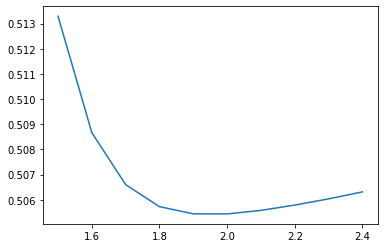

In [16]:
plt.plot(outer_rad,Volt)

In [17]:
thickness_ratio

0.65

In [18]:
final = pd.DataFrame(list(zip(pressure,outer_rad,Volt,inner_lambda,A_str)), columns = ['pressure','Median Radius', 'Voltage','inner Lambda','Normalised_A'])
final
s1 = 'Bifurcation_stackedfreetube_k_'
s2 = str(k)
s3 = '_pressure_'
s4 = str(press)
s5 = '_mu_ratio_'
s6 = str(mu)
s7 = '_thicknessvariation_outervolt'
s8 = '.xlsx'
print(s1 + s2 + s3 + s4 + s5 + s6 + s7 + s8 )
# final.to_excel(s)
final.to_excel('tp.xlsx')

Bifurcation_stackedfreetube_k_2_pressure_0.04_mu_ratio_1_thicknessvariation_outervolt.xlsx


In [7]:
#  M = Matrix([[eq1.coeff(c1, 1), eq1.coeff(c2, 1), eq1.coeff(c3, 1), eq1.coeff(c4, 1), eq1.coeff(c5, 1), eq1.coeff(c6, 1), eq1.coeff(c7, 1), eq1.coeff(c8, 1), eq1.coeff(c9, 1), eq1.coeff(c10, 1), eq1.coeff(c11, 1), eq1.coeff(c12, 1)],
#                     [eq2.coeff(c1, 1), eq2.coeff(c2, 1), eq2.coeff(c3, 1), eq2.coeff(c4, 1), eq2.coeff(c5, 1), eq2.coeff(c6, 1), eq2.coeff(c7, 1), eq2.coeff(c8, 1), eq2.coeff(c9, 1), eq2.coeff(c10, 1), eq2.coeff(c11, 1), eq2.coeff(c12, 1)],
#                     [eq3.coeff(c1, 1), eq3.coeff(c2, 1), eq3.coeff(c3, 1), eq3.coeff(c4, 1), eq3.coeff(c5, 1), eq3.coeff(c6, 1), eq3.coeff(c7, 1), eq3.coeff(c8, 1), eq3.coeff(c9, 1), eq3.coeff(c10, 1), eq3.coeff(c11, 1), eq3.coeff(c12, 1)],
#                     [eq4.coeff(c1, 1), eq4.coeff(c2, 1), eq4.coeff(c3, 1), eq4.coeff(c4, 1), eq4.coeff(c5, 1), eq4.coeff(c6, 1), eq4.coeff(c7, 1), eq4.coeff(c8, 1), eq4.coeff(c9, 1), eq4.coeff(c10, 1), eq4.coeff(c11, 1), eq4.coeff(c12, 1)],
#                     [eq5.coeff(c1, 1), eq5.coeff(c2, 1), eq5.coeff(c3, 1), eq5.coeff(c4, 1), eq5.coeff(c5, 1), eq5.coeff(c6, 1), eq5.coeff(c7, 1), eq5.coeff(c8, 1), eq5.coeff(c9, 1), eq5.coeff(c10, 1), eq5.coeff(c11, 1), eq5.coeff(c12, 1)],
#                     [eq6.coeff(c1, 1), eq6.coeff(c2, 1), eq6.coeff(c3, 1), eq6.coeff(c4, 1), eq6.coeff(c5, 1), eq6.coeff(c6, 1), eq6.coeff(c7, 1), eq6.coeff(c8, 1), eq6.coeff(c9, 1), eq6.coeff(c10, 1), eq6.coeff(c11, 1), eq6.coeff(c12, 1)],
#                     [eq7.coeff(c1, 1), eq7.coeff(c2, 1), eq7.coeff(c3, 1), eq7.coeff(c4, 1), eq7.coeff(c5, 1), eq7.coeff(c6, 1), eq7.coeff(c7, 1), eq7.coeff(c8, 1), eq7.coeff(c9, 1), eq7.coeff(c10, 1), eq7.coeff(c11, 1), eq7.coeff(c12, 1)],
#                     [eq8.coeff(c1, 1), eq8.coeff(c2, 1), eq8.coeff(c3, 1), eq8.coeff(c4, 1), eq8.coeff(c5, 1), eq8.coeff(c6, 1), eq8.coeff(c7, 1), eq8.coeff(c8, 1), eq8.coeff(c9, 1), eq8.coeff(c10, 1), eq8.coeff(c11, 1), eq8.coeff(c12, 1)],
#                     [eq9.coeff(c1, 1), eq9.coeff(c2, 1), eq9.coeff(c3, 1), eq9.coeff(c4, 1), eq9.coeff(c5, 1), eq9.coeff(c6, 1), eq9.coeff(c7, 1), eq9.coeff(c8, 1), eq9.coeff(c9, 1), eq9.coeff(c10, 1), eq9.coeff(c11, 1), eq9.coeff(c12, 1)],
#                     [eq10.coeff(c1, 1), eq10.coeff(c2, 1), eq10.coeff(c3, 1), eq10.coeff(c4, 1), eq10.coeff(c5, 1), eq10.coeff(c6, 1), eq10.coeff(c7, 1), eq10.coeff(c8, 1), eq10.coeff(c9, 1), eq10.coeff(c10, 1), eq10.coeff(c11, 1), eq10.coeff(c12, 1)],
#                     [eq11.coeff(c1, 1), eq11.coeff(c2, 1), eq11.coeff(c3, 1), eq11.coeff(c4, 1), eq11.coeff(c5, 1), eq11.coeff(c6, 1), eq11.coeff(c7, 1), eq11.coeff(c8, 1), eq11.coeff(c9, 1), eq11.coeff(c10, 1), eq11.coeff(c11, 1), eq11.coeff(c12, 1)],
#                     [eq12.coeff(c1, 1), eq12.coeff(c2, 1), eq12.coeff(c3, 1), eq12.coeff(c4, 1), eq12.coeff(c5, 1), eq12.coeff(c6, 1), eq12.coeff(c7, 1), eq12.coeff(c8, 1), eq12.coeff(c9, 1), eq12.coeff(c10, 1), eq12.coeff(c11, 1), eq12.coeff(c12, 1)]
#                    ])

# M

In [8]:
#         eq10 = (-1/2)*x4**(-3)*((-4)*A*k**(-2)*mu*x4**2*(B+(-2)*x4**2)*y11+2*A*k**(-2)*mu*x4**3*((-1)*B+x4**2)*y12+2*A*k**(-2)*((-1)+k**2)*mu*(B+x4**2)*y9+3*Ri**(-2)*(Ro+(-1)*Ro1)**2*Vbar**2*x4*y10*log((B*Ri**2+A*Ro**2)**(-1/2)*(B*Ri**2+A*Ro1**2)**(1/2))**(-2)+2*Ri**(-2)*(Ro+(-1)*Ro1)**2*Vbar*x4**2*y8*log((B*Ri**2+A*Ro**2)**(-1/2)*(B*Ri**2+A*Ro1**2)**(1/2))**(-1)+k**(-2)*x4*(B+(-1)*x4**2)**(-1)*y10*(2*A*B**2*mu+3*A*B**2*k**2*mu+(-2)*B*co2*k**2*x4**2+(-5)*A*B*k**2*mu*x4**2+2*B*k**2*press*x4**2+2*co2*k**2*x4**4+(-2)*A*mu*x4**4+4*A*k**2*mu*x4**4+(-2)*k**2*press*x4**4+2*A*k**2*mu*x4**2*((-1)*B+x4**2)*log(Ri*x4)+A*k**2*mu*x4**2*(B+(-1)*x4**2)*log(Ri**2*((-1)*B+x4**2))))
#         eq11 = (-2)*press*x4**(-1)*(x4*y10+y9+(-1)*k**2*y9)+2*A*mu*x4*((-1)*B+x4**2)**(-1)*(x4*y10+y9+(-1)*k**2*y9)+2*Ri**(-2)*(Ro+(-1)*Ro1)**2*Vbar*x4**(-3)*math.log((B*Ri**2+A*Ro**2)**(-1/2)*(B*Ri**2+A*Ro1**2)**(1/2))**(-2)*(Vbar*(x4*y10+x4**2*y11+((-1)+k**2)*y9)+k**2*x4*y7*math.log((B*Ri**2+A*Ro**2)**(-1/2)*(B*Ri**2+A*Ro1**2)**(1/2)))+(-2)*(2*y10+x4*y11)*(co2+(1/2)*Ri**(-2)*x4**(-2)*((Ro+(-1)*Ro1)**2*Vbar**2*math.log((B*Ri**2+A*Ro**2)**(-1/2)*(B*Ri**2+A*Ro1**2)**(1/2))**(-2)+(-1)*A*mu*Ri**2*(B+(-2)*x4**2*math.log(Ri*x4)+x4**2*math.log(Ri**2*((-1)*B+x4**2)))))
       

In [9]:
# eq12.coeff(c1, 1), eq12.coeff(c2, 1), eq12.coeff(c3, 1), eq12.coeff(c4, 1), eq12.coeff(c5, 1), eq12.coeff(c6, 1)

In [10]:
# y7 = c7*y7_sol1[0] + c8*y7_sol2[0] + c9*y7_sol3[0] + c10*y7_sol4[0] + c11*y7_sol5[0] + c12*y7_sol6[0]
# y8 = c7*y8_sol1[0] + c8*y8_sol2[0] + c9*y8_sol3[0] + c10*y8_sol4[0] + c11*y8_sol5[0] + c12*y8_sol6[0]
# y9 = c7*y9_sol1[0] + c8*y9_sol2[0] + c9*y9_sol3[0] + c10*y9_sol4[0] + c11*y9_sol5[0] + c12*y9_sol6[0]
# y10 = c7*y10_sol1[0] + c8*y10_sol2[0] + c9*y10_sol3[0] + c10*y10_sol4[0] + c11*y10_sol5[0] + c12*y10_sol6[0]
# y11 = c7*y11_sol1[0] + c8*y11_sol2[0] + c9*y11_sol3[0] + c10*y11_sol4[0] + c11*y11_sol5[0] + c12*y11_sol6[0]
# y12 = c7*y12_sol1[0] + c8*y12_sol2[0] + c9*y12_sol3[0] + c10*y12_sol4[0] + c11*y12_sol5[0] + c12*y12_sol6[0]

In [11]:
# innertube innerradius sigma_rr
# eq1 = (-1/2)*x1**(-3)*(2*A*k**(-2)*((-1)+k**2)*(B+x1**2)*y3+(-4)*A*k**(-2)*x1**2*(B+(-2)*x1**2)*y5+2*A*k**(-2)*x1**3*((-1)*B+x1**2)*y6+3*Ri**(-2)*(Ri+(-1)*Ro)**2*Vbar**2*x1*y4*math.log(((A+B)*Ri**2)**(-1/2)*(B*Ri**2+A*Ro**2)**(1/2))**(-2)+2*Ri**(-2)*(Ri+(-1)*Ro)**2*Vbar*x1**2*y2*math.log(((A+B)*Ri**2)**(-1/2)*(B*Ri**2+A*Ro**2)**(1/2))**(-1)+k**(-2)*x1*(B+(-1)*x1**2)**(-1)*y4*(2*A*B**2+3*A*B**2*k**2+(-5)*A*B*k**2*x1**2+(-2)*B*c1*k**2*x1**2+2*B*k**2*press*x1**2+(-2)*A*x1**4+4*A*k**2*x1**4+2*c1*k**2*x1**4+(-2)*k**2*press*x1**4+2*A*k**2*x1**2*((-1)*B+x1**2)*math.log(Ri*x1)+A*k**2*x1**2*(B+(-1)*x1**2)*math.log(Ri**2*((-1)*B+x1**2))))
# eq2 = (-2)*press*x1**(-1)*(y3+(-1)*k**2*y3+x1*y4)+2*A*x1*((-1)*B+x1**2)**(-1)*(y3+(-1)*k**2*y3+x1*y4)+2*Ri**(-2)*(Ri+(-1)*Ro)**2*Vbar*x1**(-3)*math.log(((A+B)*Ri**2)**(-1/2)*(B*Ri**2+A*Ro**2)**(1/2))**(-2)*(((-1)+k**2)*Vbar*y3+Vbar*x1*(y4+x1*y5)+k**2*x1*y1*math.log(((A+B)*Ri**2)**(-1/2)*(B*Ri**2+A*Ro**2)**(1/2)))+(-2)*(2*y4+x1*y5)*(c1+(-1/2)*A*B*x1**(-2)+(1/2)*Ri**(-2)*(Ri+(-1)*Ro)**2*Vbar**2*x1**(-2)*math.log(((A+B)*Ri**2)**(-1/2)*(B*Ri**2+A*Ro**2)**(1/2))**(-2)+A*math.log(Ri*x1)+(-1/2)*A*math.log(Ri**2*((-1)*B+x1**2)))

In [12]:
# Inner tube PDE y1,y2,y3,y4,y5,y6
# eq1 = x**(-3)*log(((A+B)*Ri**2)**(-1/2)*(B*Ri**2+A*Ro**2)**(1/2))**(-1)*(((-1)+k**2)*Vbar*y3+x*(k**2*y1*log(((A+B)*Ri**2)**(-1/2)*(B*Ri**2+A*Ro**2)**(1/2))+(-1)*x*log(((A+B)*Ri**2)**(-1/2)*(B*Ri**2+A*Ro**2)**(1/2))*y2+Vbar*y4+(-1)*Vbar*x*y5)
# eq2 = x**(-4)*((-1)*B+x**2)**(-3)*(((-1)+k**2)*(B+(-1)*x**2)*(3*B**2+(-2)*B*x**2+((-1)+k**2)*x**4)*y3+x*((B**3*(3+k**2)+(-1)*B**2*(5+k**2)*x**2+B*(1+(-4)*k**2)*x**4+(1+2*k**2)*x**6)*y4+x*(B+(-1)*x**2)*((-1)*(B**2*(3+k**2)+(-2)*B*((-1)+k**2)*x**2+((-5)+2*k**2)*x**4)*y5+2*x*(B**2+(-4)*B*x**2+3*x**4)*y6)))

In [13]:
# Outer tube PDE with y1,y2,y3,y4,y5,y6
# eq3 = x**(-3)*log((B*Ri**2+A*Ro**2)**(-1/2)*(B*Ri**2+A*Ro1**2)**(1/2))**(-1)*(((-1)+k**2)*Vbar*y3+x*(k**2*y1*log((B*Ri**2+A*Ro**2)**(-1/2)*(B*Ri**2+A*Ro1**2)**(1/2))+(-1)*x*log ((B*Ri**2+A*Ro**2)**(-1/2)*(B*Ri**2+A*Ro1**2)**(1/2))*y2+Vbar*y4+(-1)*Vbar*x*y5)) 
# eq4 = x**(-4)*((-1)*B+x**2)**(-3)*(((-1)+k**2)*(B+(-1)*x**2)*(3*B**2+(-2)*B*x**2+((-1)+k**2)*x**4)*y3+x*((B**3*(3+k**2)+(-1)*B**2*(5+k**2)*x**2+B*(1+(-4)*k**2)*x**4+(1+2*k**2)*x**6)*y4+x*(B+(-1)*x**2)*((-1)*(B**2*(3+k**2)+(-2)*B*((-1)+k**2)*x**2+((-5)+2*k**2)*x**4)*y5+2*x*(B**2+(-4)*B*x**2+3*x**4)*y6))) 